In [1]:
import numpy as np
from pathlib import Path
# import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
results_path = Path("../save/results/condmdi_random_frames/condsamples000750000__benchmark_clip_T=30_CI=0_CRG=0_KGP=1.0_seed10/results.npy")
results = np.load(results_path, allow_pickle=True).item()

In [4]:
for key, value in results.items():
    shape = value.shape if hasattr(value, 'shape') else "()"
    print(f"{key}: {shape}")

motion: (3, 10, 22, 3, 196)
text: (30,)
lengths: (3, 10)
num_samples: ()
num_repetitions: ()
observed_motion: (10, 22, 3, 196)
observed_mask: (10, 22, 1, 196)


## Numpy Format

| Key | Shape |
| --- | --- |
| `motion` | `[num_rep, num_samples, 22, 3, n_frames]` |
| `observed_motion` | `[num_samples, 22, 3, n_frames]` |
| `observed_mask` | `[num_samples, 22, 1, n_frames]` |
| `lengths` | `[num_rep, num_samples]` |
| `text` | `[num_rep, num_samples]` |

where
- `num_rep = 3`
- `num_samples = 10`
- `n_frames = 196` (maximum is 196, can be lower)
- `n_joints = 22` (smpl joints)


In [11]:

# from humanml/utils/paramUtil.py
t2m_kinematic_chain = [[0, 2, 5, 8, 11], [0, 1, 4, 7, 10], [0, 3, 6, 9, 12, 15], [9, 14, 17, 19, 21], [9, 13, 16, 18, 20]]


In [5]:
first_motion = results["motion"][0,0].transpose(2,0,1)
print(first_motion.shape)

(196, 22, 3)


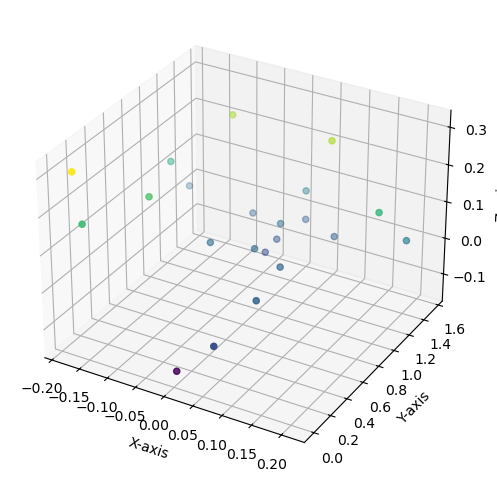

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(first_motion[0, :, 0], first_motion[0, :, 1], first_motion[0, :, 2], c=first_motion[0, :, 2], cmap='viridis', marker='o')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

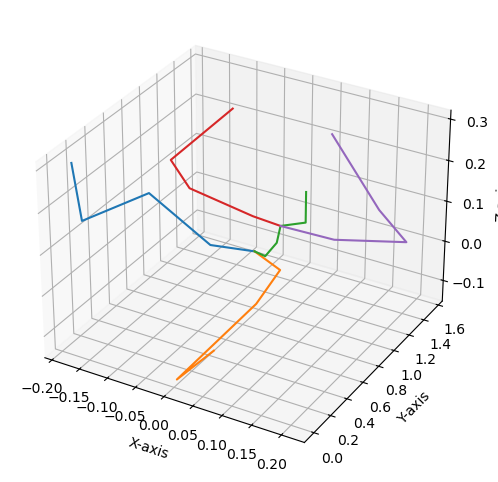

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

frame = 0
for chain in t2m_kinematic_chain:
    ax.plot3D(
        first_motion[frame, chain, 0],
        first_motion[frame, chain, 1],
        first_motion[frame, chain, 2],
    )

plt.show()